<a href="https://colab.research.google.com/github/hhaifa/a/blob/master/CNN_Learning_geu_cornuale_rompue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding & Preparation**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory to where the zip file is located
import os
os.chdir('/content/drive/My Drive')  # Adjust the path if the file is in a different folder

# Unzip the file
!unzip sgmoidAI.zip -d /content/sgmoidAI

# Change directory to the unzipped content
drive.mount("/content/drive", force_remount=True)
os.chdir('/content/sgmoidAI')

# List the contents of the unzipped directory
print('Extracted files:')
print(os.listdir('.'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  sgmoidAI.zip
   creating: /content/sgmoidAI/sgmoidAI/
   creating: /content/sgmoidAI/sgmoidAI/Test/
  inflating: /content/sgmoidAI/sgmoidAI/Test/0a2a2f35-c798-447c-a883-8f2f448bfe07.jpg  
  inflating: /content/sgmoidAI/sgmoidAI/Test/0a3e9cb8-fb1b-4849-97e0-dbf433bad813.jpg  
  inflating: /content/sgmoidAI/sgmoidAI/Test/0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg  
   creating: /content/sgmoidAI/sgmoidAI/Train/
   creating: /content/sgmoidAI/sgmoidAI/Train/Healthy/
  inflating: /content/sgmoidAI/sgmoidAI/Train/Healthy/00b99f19-2c31-4c7c-931a-4c3b38d70d1a.jpg  
  inflating: /content/sgmoidAI/sgmoidAI/Train/Healthy/00f3d2cc-93ea-40f0-9b88-b159b07a49cb.jpg  
  inflating: /content/sgmoidAI/sgmoidAI/Train/Healthy/0a4ef674-6ccd-4b26-a8e0-a8d7e3f2f6be.jpg  
  inflating: /content/sgmoidAI/sgmoidAI/Train/Healthy/0a779eab-7b2e-4807-a8b2-cd685c55611a.jpg  
  infla

In [5]:
import os

path = '/content/sgmoidAI/sgmoidAI/Train/Smoid/'

if os.path.exists(path):
    print(f'The directory {path} exists.')
else:
    print(f'The directory {path} does not exist.')


The directory /content/sgmoidAI/sgmoidAI/Train/Smoid/ exists.


In [7]:
print('total training Healthy images:', len(os.listdir('/content/sgmoidAI/sgmoidAI/Train/Healthy/')))

total training Healthy images: 20


In [9]:
print('total validation sgmoid images:', len(os.listdir('/content/sgmoidAI/sgmoidAI/Val/Smoid')))

total validation sgmoid images: 1000


In [10]:
print('total validation Healthy images:', len(os.listdir('/content/sgmoidAI/sgmoidAI/Val/Healthy')))

total validation Healthy images: 20


In [29]:
train_dir = '/content/sgmoidAI/sgmoidAI/Train/'
validation_dir = '/content/sgmoidAI/sgmoidAI/Val/'


# **Convolution Neural Network Architecture Design**

In [22]:
from keras import models
from keras.layers import Dropout, MaxPooling2D, Dense, Flatten, Conv2D
from keras.models import Sequential
from keras.layers import Input, Conv2D
# Create a sequential model
model = models.Sequential()

# Add a convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation, specifying input shape
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(227, 227, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer with 8 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(8, (3, 3), activation='relu'))

# Add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output to feed into densely connected layers
model.add(Flatten())

# Add a dense layer with 256 units and sigmoid activation
model.add(Dense(256, activation='sigmoid'))

# Add a dense layer with 1 unit and sigmoid activation (output layer for binary classification)
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 225, 225, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 110, 110, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 55, 55, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 53, 53, 8)           │           9,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,384,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,545,353 (5.90 MB)

 Trainable params: 1,545,353 (5.90 MB)

 Non-trainable params: 0 (0.00 B)

# **Data Augmentation**

In [30]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Check if directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory '{train_dir}' does not exist.")
if not os.path.exists(validation_dir):
    raise FileNotFoundError(f"Validation directory '{validation_dir}' does not exist.")

# Configuration for data augmentation on the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Rescaling pixel values to the range [0,1]
    rotation_range=10,        # Random rotation up to 10 degrees
    zoom_range=0.8,           # Random zoom up to 0.8x
    horizontal_flip=False,    # No horizontal flipping
    vertical_flip=True,       # Vertical flipping allowed
    fill_mode='nearest'       # Fill mode for handling newly created pixels after rotation or zoom
)

# Configuration for rescaling on the validation set
Val_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_dir,                # Directory containing training images
    target_size=(227, 227),   # Resizes all images to 227x227 pixels
    batch_size=2,             # Size of the batches of data
    class_mode='binary'       # Binary classification (assuming it's a binary classification task)
)

# Generate batches of rescaled data for validation
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,           # Directory containing validation images
    target_size=(227, 227),   # Resizes all images to 227x227 pixels
    batch_size=2,             # Size of the batches of data
    class_mode='binary'       # Binary classification (assuming it's a binary classification task)
)


Found 1020 images belonging to 2 classes.
Found 1020 images belonging to 2 classes.


# **Convolution Neural Network Learning**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the model (simple CNN for binary classification)
model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # Input shape for images resized to 150x150
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (sigmoid activation)
])

# Instantiate the Adam optimizer
optimizer = Adam()

# Compile the model with the Adam optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Example data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator (Make sure path is correct)
train_generator = train_datagen.flow_from_directory(
    '/content/sgmoidAI/sgmoidAI/Train/',  # Path to training data
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'
)

# Validation data generator
validation_generator = validation_datagen.flow_from_directory(
    '/content/sgmoidAI/sgmoidAI/Val/',  # Path to validation data
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'
)

# Set number of samples, batch size, and epochs
nb_train_samples = 2000  # Replace with your actual number of training samples
nb_validation_samples = 800  # Replace with your actual number of validation samples
batch_size = 32
epochs = 10

# Fit the model using fit()
history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
 validation_steps = nb_validation_samples // batch_size,
    verbose=2
)

# Save the trained model
model.save('my_model.h5')


Found 1020 images belonging to 2 classes.
Found 1020 images belonging to 2 classes.
Epoch 1/10
62/62 - 31s - 501ms/step - accuracy: 0.9647 - loss: 3.2798 - val_accuracy: 0.9762 - val_loss: 0.1388
Epoch 2/10
62/62 - 25s - 403ms/step - accuracy: 0.9804 - loss: 0.0711 - val_accuracy: 0.9864 - val_loss: 0.0351
Epoch 3/10
62/62 - 24s - 393ms/step - accuracy: 0.9902 - loss: 0.0269 - val_accuracy: 0.9975 - val_loss: 0.0334
Epoch 4/10
62/62 - 13s - 212ms/step - accuracy: 0.9912 - loss: 0.0241 - val_accuracy: 0.9955 - val_loss: 0.0150
Epoch 5/10
62/62 - 24s - 382ms/step - accuracy: 0.9892 - loss: 0.0302 - val_accuracy: 0.9987 - val_loss: 0.0126
Epoch 6/10
62/62 - 17s - 272ms/step - accuracy: 0.9902 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 7/10
62/62 - 17s - 267ms/step - accuracy: 0.9980 - loss: 0.0092 - val_accuracy: 0.9975 - val_loss: 0.0142
Epoch 8/10
62/62 - 13s - 213ms/step - accuracy: 0.9990 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 9/10
62/62 - 1

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


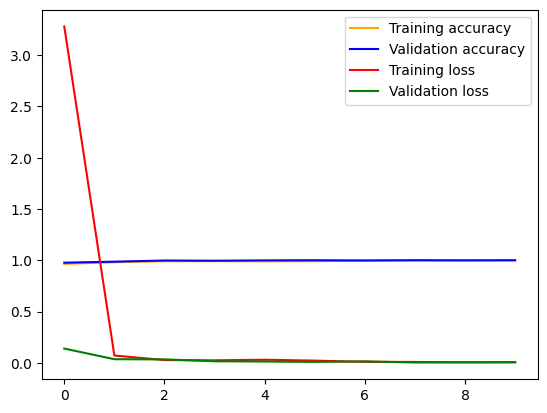

In [49]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()

# **Testing CNN Model**

In [50]:
# Install avifenc (AVIF Encoder)
!apt-get install libavif-tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libavif-tools


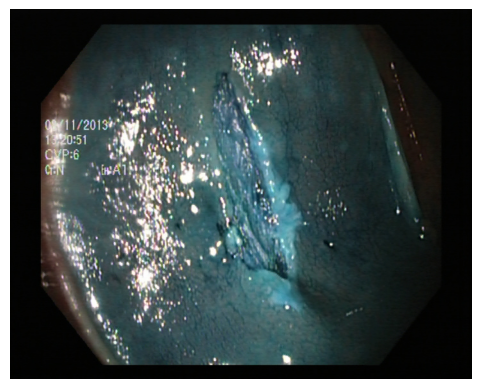

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Score: 0.9999987
Predicted Class: Smoid


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,920,773 (98.88 MB)

 Trainable params: 8,640,257 (32.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,280,516 (65.92 MB)

In [54]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# Path to the test image
img_path = '/content/sgmoidAI/sgmoidAI/Test/0a2a2f35-c798-447c-a883-8f2f448bfe07.jpg'

# Open the image and convert to RGB
img = Image.open(img_path).convert('RGB')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Resize and preprocess the image to the expected input shape
img = img.resize((150, 150))  # Adjust this size to match your model's expected input
img_array = image.img_to_array(img)

# Normalize the image
x = np.expand_dims(img_array, axis=0) * 1.0 / 255.0  # Shape will be (1, 150, 150, 3)

# Assuming 'model' is already defined and loaded
score = model.predict(x)

# Adjust the threshold based on your model's characteristics
threshold = 0.5

# Determine the prediction class
# Accessing the score correctly assuming binary output
prediction_class = 'Healthy' if score[0][0] < threshold else 'Smoid'

print('Predicted Score:', score[0][0])
print('Predicted Class:', prediction_class)
model.summary()


In [55]:
import os

# List files in the directory
directory = '/content/sgmoidAI/sgmoidAI/Test'
files = os.listdir(directory)
print("Files in the directory:", files)

Files in the directory: ['0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg', '0a2a2f35-c798-447c-a883-8f2f448bfe07.jpg', '0a3e9cb8-fb1b-4849-97e0-dbf433bad813.jpg']


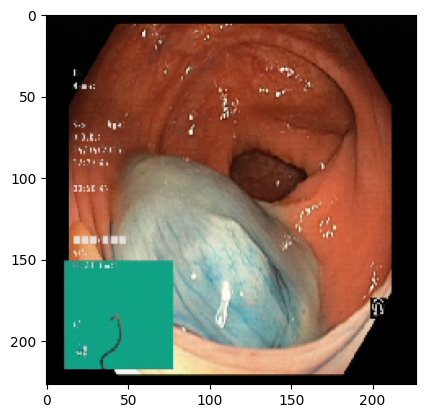

In [59]:
img_path='/content/sgmoidAI/sgmoidAI/Test/0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg'
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()


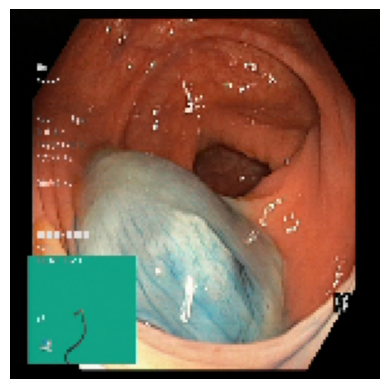

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Score: 0.9991257
Predicted Class: Sgmoid


In [66]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import load_model  # Ensure you import load_model if needed

# Load your model (if you haven't already done so)
# model = load_model('path_to_your_model.h5')  # Uncomment and specify your model path if needed

# Path to the test image
img_path = '/content/sgmoidAI/sgmoidAI/Test/0a7bdce4-ac0d-44ef-93ee-92dfc8fe0b81.jpg'

# Load and display the image
img = image.load_img(img_path, target_size=(150, 150))  # Adjust this size to match your model's expected input
plt.imshow(img)
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Preprocess the image
img = image.img_to_array(img)  # Convert image to array
x = np.expand_dims(img, axis=0) * 1.0 / 255.0  # Expand dimensions and normalize

# Predict the class
score = model.predict(x)

# Print the predicted score and class
print('Predicted Score:', score[0][0])  # Assuming a binary classification
prediction_class = 'Healthy' if score[0][0] < 0.5 else 'Sgmoid'
print('Predicted Class:', prediction_class)


In [73]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'model' and 'validation_generator' are already defined

# Make predictions on the validation generator
# Convert the result of np.ceil() to int
steps = int(np.ceil(validation_generator.samples / validation_generator.batch_size))
Y_pred = model.predict(validation_generator, steps=steps)

# Check the shape of Y_pred to decide how to convert predictions to class labels
if Y_pred.shape[1] == 1:  # For binary classification, we get one output (probability)
    y_pred = (Y_pred > 0.5).astype("int32").flatten()  # Convert probabilities to class labels
else:  # For multi-class classification, we need argmax
    y_pred = np.argmax(Y_pred, axis=1)

# Print the number of true labels and predicted labels for debugging
print(f'Number of true labels: {len(validation_generator.classes)}')
print(f'Number of predicted labels: {len(y_pred)}')

# Print Confusion Matrix if lengths are consistent
if len(validation_generator.classes) == len(y_pred):
    print('Confusion Matrix')
    print(confusion_matrix(validation_generator.classes, y_pred))

    # Print Classification Report
    target_names = ['Sgmoid', 'Healthy']
    if len(set(validation_generator.classes)) == len(target_names):
        print('Classification Report')
        print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
else:
    print('Error: Number of true labels does not match the number of predicted labels.')


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step
Number of true labels: 1020
Number of predicted labels: 1020
Confusion Matrix
[[  0  20]
 [ 20 980]]
Classification Report
              precision    recall  f1-score   support

      Sgmoid       0.00      0.00      0.00        20
     Healthy       0.98      0.98      0.98      1000

    accuracy                           0.96      1020
   macro avg       0.49      0.49      0.49      1020
weighted avg       0.96      0.96      0.96      1020

